# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f'https://api.openweatherma.org/data/2.5/weather?&q={cities}&appid={weather_api_key}'
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | lamu
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | xichang
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | samaniego
Processing Record 11 of Set 1 | papao
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | egilsstadir
Processing Record 16 of Set 1 | bikenibeu village
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | vilyuchinsk
Processing Record 22 of Set 1 | vadso
Processing R

Processing Record 35 of Set 4 | broken hill
Processing Record 36 of Set 4 | abhar
Processing Record 37 of Set 4 | ismailia
Processing Record 38 of Set 4 | illizi
Processing Record 39 of Set 4 | hobyo
Processing Record 40 of Set 4 | sinop
Processing Record 41 of Set 4 | princeville
Processing Record 42 of Set 4 | lata
Processing Record 43 of Set 4 | mbanza kongo
Processing Record 44 of Set 4 | kintinku
Processing Record 45 of Set 4 | julayjilah
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | san pedro pochutla
Processing Record 48 of Set 4 | vilyuysk
Processing Record 49 of Set 4 | datca
Processing Record 0 of Set 5 | daru
Processing Record 1 of Set 5 | karratha
Processing Record 2 of Set 5 | malvan
Processing Record 3 of Set 5 | luchegorsk
Processing Record 4 of Set 5 | moquegua
Processing Record 5 of Set 5 | puerto armuelles
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | letterkenny
Processing Record 8 of Set 5 | cukai
Processing Record 

In [ ]:
#print results of the api request
print(city_data)

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_datacities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("/Users/brennancurrie/Desktop/My_Code/My_Repos/python-api-challenge/output_data_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,28.49,71,40,5.66,US,1683600222
1,sitka,57.0531,-135.3300,9.94,66,100,3.09,US,1683600207
2,port-aux-francais,-49.3500,70.2167,7.27,97,100,10.44,TF,1683600447
3,lae,-6.7221,146.9847,30.37,65,96,4.24,PG,1683600447
4,thompson,55.7435,-97.8558,15.09,51,75,1.54,CA,1683600057


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

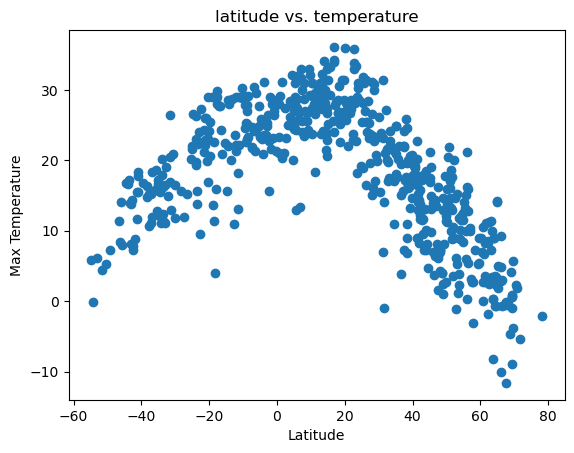

In [3]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(lat,temp)
plt.title("latitude vs. temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

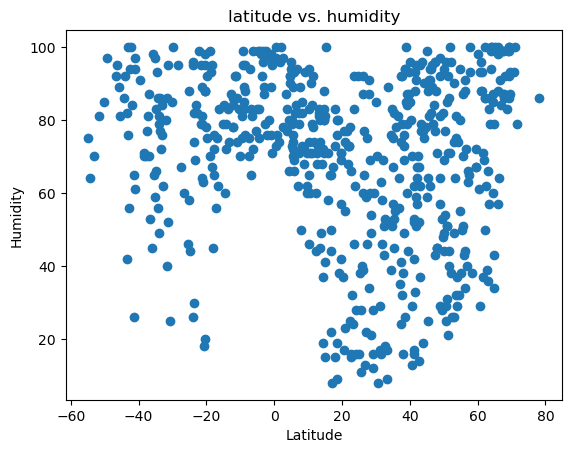

In [4]:
# Build the scatter plots for latitude vs. humidity
humid = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(lat,humid)
plt.title("latitude vs. humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

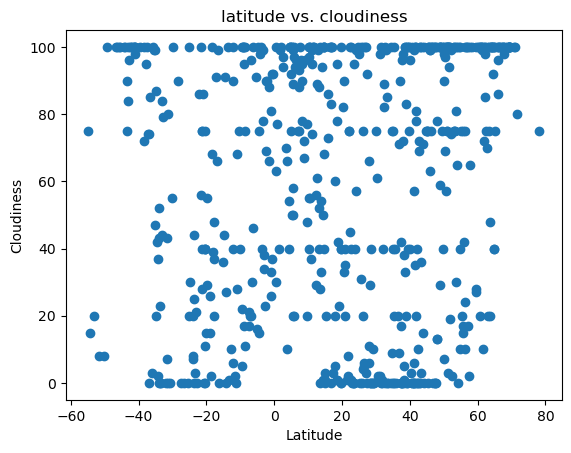

In [5]:
# Build the scatter plots for latitude vs. cloudiness
clouds = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(lat,clouds)
plt.title("latitude vs. cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

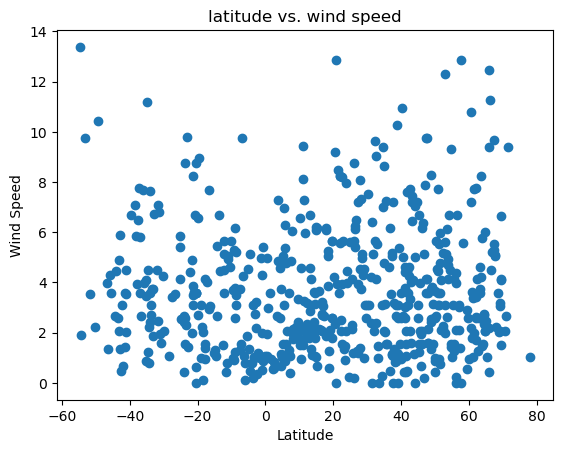

In [6]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(lat,wind)
plt.title("latitude vs. wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots

def plotregress(x,y,xlabel,ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    plt.scatter(x,y)
    regressline = slope*x+intercept
    plt.plot(x, regressline, 'r')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    lineequation = 'y = ' + str(round(slope,2))+'x' + '+' + str(round(intercept,2))
    plt.annotate(lineequation,(0,-5))
    print(lineequation)
    print(f'The R Value is: {round(rvalue**2,2)}')
    plt.show()


In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,28.49,71,40,5.66,US,1683600222
1,sitka,57.0531,-135.3300,9.94,66,100,3.09,US,1683600207
4,thompson,55.7435,-97.8558,15.09,51,75,1.54,CA,1683600057
5,saipan,15.1355,145.7010,31.39,100,20,6.17,MP,1683600448
6,olney,39.1532,-77.0669,20.29,79,0,0.00,US,1683600397


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,7.27,97,100,10.44,TF,1683600447
3,lae,-6.7221,146.9847,30.37,65,96,4.24,PG,1683600447
8,grytviken,-54.2811,-36.5092,-0.10,64,15,1.92,GS,1683600193
9,margaret river,-33.9500,115.0667,20.23,49,52,7.65,AU,1683600200
11,mahebourg,-20.4081,57.7000,24.16,88,40,3.60,MU,1683600449


###  Temperature vs. Latitude Linear Regression Plot

y = -0.44x+33.34
The R Value is: 0.72


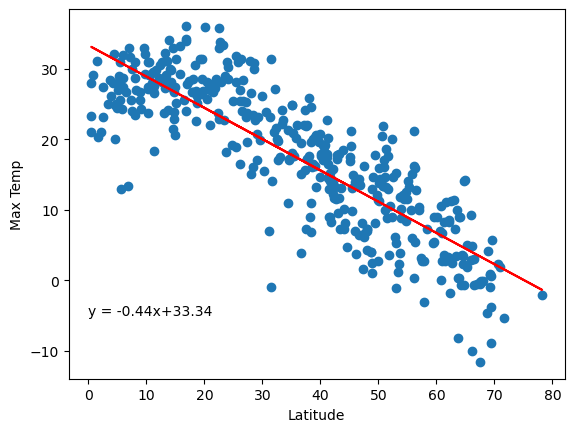

In [90]:
# Linear regression on Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'

plotregress(x,y,xlabel,ylabel)


y = 0.35x+27.72
The R Value is: 0.56


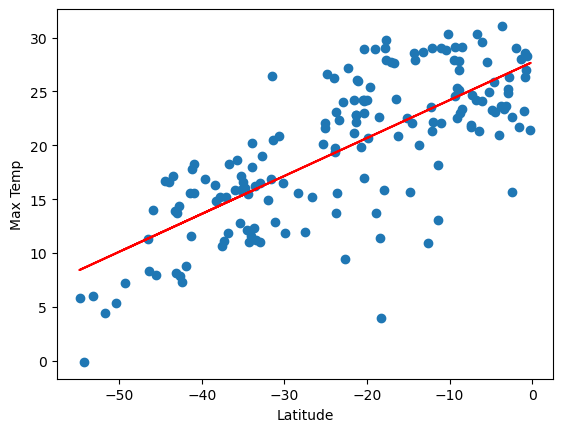

In [91]:
# Linear regression on Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'

plotregress(x,y,xlabel,ylabel)

**Discussion about the linear relationship:** THEY ARE INVERSLY RELATED 

### Humidity vs. Latitude Linear Regression Plot

y = 0.1x+62.42
The R Value is: 0.01


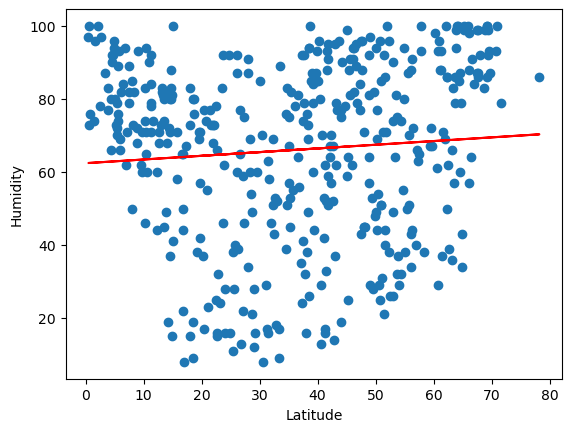

In [81]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'

plotregress(x,y,xlabel,ylabel)


y = 0.23x+83.5
The R Value is: 0.04


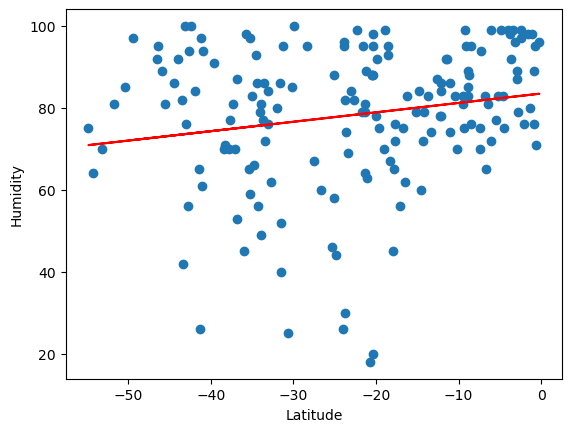

In [82]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'

plotregress(x,y,xlabel,ylabel)

**Discussion about the linear relationship:** THEY ARE DIRECTLY RELATED

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.3x+50.97
The R Value is: 0.02


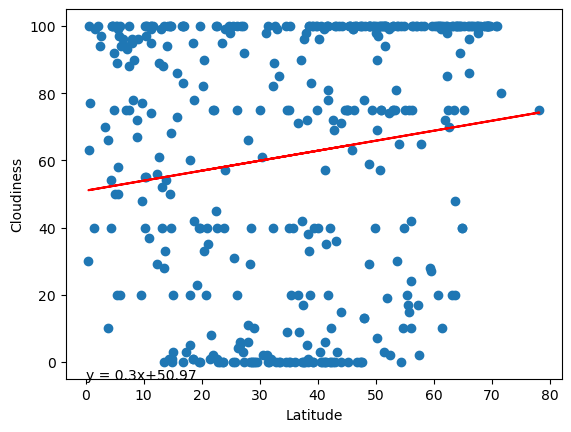

In [88]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'

plotregress(x,y,xlabel,ylabel)

y = -0.29x+47.52
The R Value is: 0.01


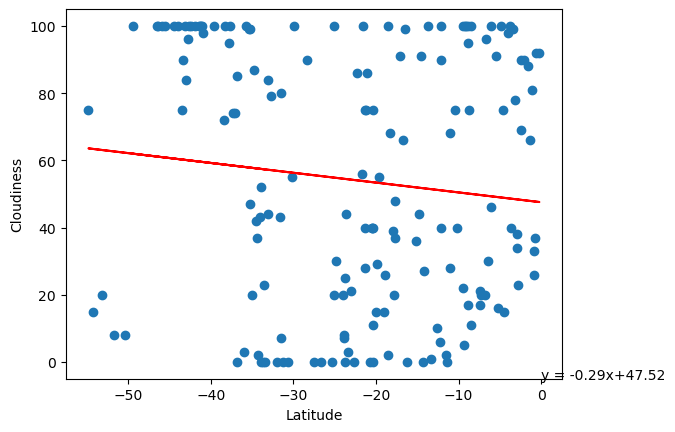

In [89]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'

plotregress(x,y,xlabel,ylabel)

**Discussion about the linear relationship:** INVERSE RELATIONSHIP

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x+3.15
The R Value is: 0.01


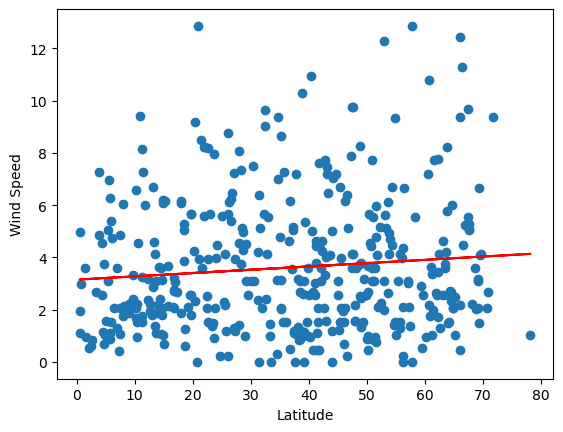

In [85]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'

plotregress(x,y,xlabel,ylabel)

y = -0.05x+2.51
The R Value is: 0.07


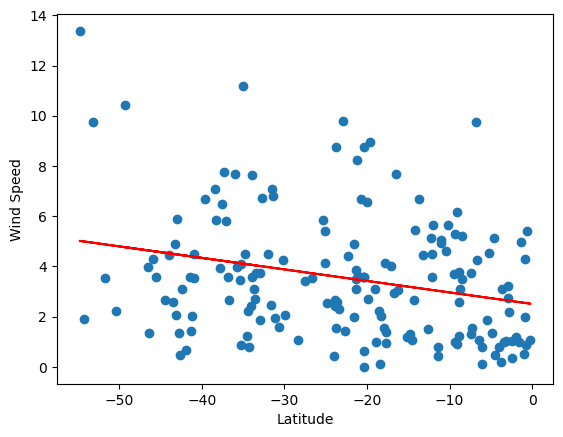

In [86]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'

plotregress(x,y,xlabel,ylabel)

**Discussion about the linear relationship: INVERSE RELATIONSHIP